---
# Plankton Recognition Challenge
---

Plankton comprises all the organisms freely drifting with ocean currents. These life forms are a critically important piece of oceanic ecosystems, accounting for more than half the primary production on earth and nearly half the total carbon fixed in the global carbon cycle. They also form the foundation of aquatic food webs, including those of large, commercially important fisheries. Loss of plankton populations could result in ecological upheaval as well as negative societal impacts, particularly in indigenous cultures and the developing world. Plankton’s global significance makes their population levels an ideal measure of the health of the world’s oceans and ecosystems.

Traditional methods for measuring and monitoring plankton populations are time consuming and cannot scale to the granularity or scope necessary for large-scale studies. Improved approaches are needed. One such approach is through the use of underwater imagery sensors. 

In this challenge, which was prepared in cooperation with the Laboratoire d’Océanographie de Villefranche, jointly run by Sorbonne Université and CNRS, plankton images were acquired in the bay of Villefranche, weekly since 2013 and manually engineered features were computed on each imaged object. 

This challenge aims at developing solid approaches to plankton image classification. As an alternative, it is possible to use methods based on carefully (but manually) engineered features. This is in sharp contrast with “Deep Learning” methods in which features will be learned from image data alone.

The purpose of this challenge is for you to learn about the commonly used paradigms when working with real-life problems. This means you can choose one of the following paths:

- Work directly with the provided images, e.g. using a (convolutional) neural network
- Work with the supplied features extracted from the images (*native* or *skimage* or both of them)
- Extract your own features from the provided images using a technique of your choice

You will find a detailed description about the image data and the features at the end of this text.
In any case, the choice of the classifier that you decide to work with strongly depends on the choice of features.

Please bear in mind that the purpose of this challenge is not to find the best-performing model (e.g. on Kaggle there are competitions to do just that, with similar data as for this challenge). You should rather make sure to understand the dificulties that come with computer vision task, should you take this modeling approach. Moreover, you should be able to justify your choice of features/model and be able to explain its advantages and disadvantages for the task.

**IMPORTANT**: please refer to the AML course guidelines concerning grading rules. Pay especially attention to the **presentation quality** item, which boils down to: don't dump a zillion of lines of code and plots in this notebook. Produce a concise summary of your findings: this notebook can exist in two versions, a "scratch" version that you will use to work and debug, a "presentation" version that you will submit. The "presentation" notebook should go to the point, and convay the main findings of your work.

---
## Overview

Beyond simply producing a well-performing model for making predictions, in this challenge we would like you to start developing your skills as a machine learning scientist.
In this regard, your notebook should be structured in such a way as to explore the following tasks that are expected to be carried out whenever undertaking such a project.
The description below each aspect should serve as a guide for your work, but you are strongly encouraged to also explore alternative options and directions. 
Thinking outside the box will always be rewarded in these challenges.


### 1. Data preparation:
   
_Data exploration_: The first broad component of your work should enable you to familiarise yourselves with the given data, an outline of which is given at the end of this challenge specification. Among others, you can work on:
   
* Data cleaning, e.g. treatment of categorial variables;
* Data visualisation; Computing descriptive statistics, e.g. correlation.

What is new in this challenge is that you will be working with image data. Therefore, you should have a look at example images located in the *imgs.zip* file (see description below). If you decide to work with the native or the skimage features, make sure to understand them!

Among others, this section should investigate:

- Distribution of the different image dimensions (including the number of channels)
- Distribution of the different labels that the images are assigned to

The image labels are organized in a taxonomy. We will measure the final model performance for the classification into the *level2* categories. Make sure to understand the meaning of this label inside the taxonomy.

_Data Pre-processing_: The previous step should give you a better understanding of which pre-processing is required for the data. This may include:

* Normalising and standardising the given data;
* Removing outliers;
* Carrying out feature selection, possibly using metrics derived from information theory;
* Handling missing information in the dataset;
* Augmenting the dataset with external information;
* Combining existing features.

Please take also note of the following aspects, that are related to this particular challente:

- If you decide to work with the provided features, some data cleaning may be required to make full use of all the data.
- If you decide to extract your own features from the images, you should explain your approach in this section.
- If you decide to work directly with the images themselves, preprocessing the images may improve your classification results. In particular, if you work with a neural network the following should be of interest to you:

  - Due to the fully-connected layers (that usually come after the convolutional ones), the input needs to have a fixed dimension.
  - Data augmentation (image rotation, scaling, cropping, etc. of the existing images) can be used to increase the size of the training data set. This may improve performance especially when little data is available for a particular class.
  - Be aware of the computational cost! It might be worth rescaling the images to a smaller size!

  All of the operations above are usually realized using a dataloader. This means that you do not need to create a modified version of the dataset and save it to disk. Instead, the dataloader processes the data "on the fly" and in-memory before passing it to the network.
  
    NB: Although aligning image sizes is necessary to train CNNs, this will prevent your classifier from learning about different object sizes as a feature. Additional gains may be achieved when also taking object sizes into account.

### 2. Model selection
An important part of the work involves the selection of a model that can successfully handle the given data and yield sensible predictions. Instead of focusing exclusively on your final chosen model, it is also important to share your thought process in this notebook by additionally describing alternative candidate models. There is a wealth of models to choose from, such as decision trees, random forests, (Bayesian) neural networks, Gaussian processes, LASSO regression, and so on. 

Irrespective of your choice, it is highly likely that your model will have one or more parameters that require tuning. There are several techniques for carrying out such a procedure, such as cross-validation.

### 3. Performance Evaluation
For the evaluation of the classification results in this challenge, you should use the F1 measure. Here the focus should be on level2 classification.

You should indicate your final evaluation score on a held-out test set. As an evaluation metric you should use the F1 score with the *average=macro* option as it is provided by the scikit-learn library. See the following link for more information:
        
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

Please note that you are responsible for creating a sensible train/validation/test split. There is no predefined held-out test data.

---
## Dataset Description

#### * Location of the Dataset on the cloud platform
The data for this challenge is located at: `/mnt/datasets/plankton/flowcam`

#### * Hierachical Taxonomy Tree for Labels 

Each object is represented by a single image and is identified by a unique integer number. It has a name associated to it which is integrated in a hierarchical taxonomic tree. The identifications are gathered from different projects, classified by different people in different contexts, so they often target different taxonomic levels. For example, let us say we classify items of clothing along the following tree

    top
        shirt
            long sleeves
            short sleeves
        sweater
            hooded
            no hood
    bottom
        pants
            jeans
            other
        shorts
        
In a first project, images are classified to the finest level possible, but it may be the case that, on some pictures, it is impossible to determine whether a sweater has a hood or not, in which case it is simply classified as `sweater`. In the second project, the operator classified tops as `shirt` or `sweater` only, and bottoms to the finest level. In a third project, the operator only separated tops from bottoms. In such a context, the original names in the database cannot be used directly because, for example `sweater` will contain images that are impossible to determine as `hooded` or `no hood` *as well as* `hooded` and `no hood` images that were simply not classified further. If all three classes (`sweater`, `hooded`, and `no hood`) are included in the training set, it will likely confuse the classifier. For this reason, we define different target taxonomic levels:

-   `level1` is the finest taxonomic level possible. In the example above, we would include `hooded` and `no hood` but discard all images in `sweater` to avoid confusion; and proceed in the same manner for other classes.

-   `level2` is a grouping of underlying levels. In the example above, it would include `shirt` (which contains all images in `shirt`, `long sleeves`, and `short sleeves`), `sweater` (which, similarly would include this class and all its children), `pants` (including children), and `shorts`. So typically, `level2` contains more images (less discarding), sorted within fewer classes than `level1`, and may therefore be an easier classification problem.

-   `level3` is an even broader grouping. Here it would be `top` vs `bottom`

-   etc.

In the Plankton Image dataset, the objects will be categorised based on a pre-defined 'level1' and 'level2'. You can opt to work on one of them, but we recommend you to work on `level2` because it is an easier classification problem.  

#### * Data Structure

    /mnt/datasets/plankton/flowcam/
        meta.csv
        taxo.csv
        features_native.csv.gz
        features_skimage.csv.gz
        imgs.zip

* `meta.csv` contains the index of images and their corresponding labels
* `taxo.csv` defines the taxonomic tree and its potential groupings at various level. Note that, the information is also available in `meta.csv`. Therefore, the information in `taxo.csv` is probably useless, but at least it gives you a global view about taxonomy tree
* `features_native.csv.gz` contain the morphological handcrafted features computed by ZooProcess. In fact, ZooProcess generates the region of interests (ROI) around each individual object from a original image of Plankton. In addition, it also computes a set of associated features measured on the object. These features are the ones contained in `features_native.csv.gz`
* `features_skimage.csv.gz` contains the morphological features recomputed with skimage.measure.regionprops on the ROIs produced by ZooProcess.
* `imgs.zip` contains a post-processed version of the original images. Images are named by `objid`.jpg

#### * Attributes in meta.csv

The file contains the image identifiers (objid) as well as the labels assigned to the images by human operators. Those are defined with various levels of precision:

* <i>unique_name</i>: raw labels from operators
* <i>level1</i>: cleaned, most detailed labels
* <i>level2</i>: regrouped (coarser) labels
* <i>lineage</i>: full taxonomic lineage of the class

Some labels may be missing (coded ‘NA’) at a given level, meaning that the corresponding objects should be discarded for the classification at this level.

#### * imgs.zip

This zip archive contains an *imgs* folder that contains all the images in .jpg format. Do not extract this folder to disk! Instead you will be loading the images to memory. See the code below for a quick how-to:

#### * Attributes in features_native.csv.gz
A brief outline of the availabel attributes in `features_native.csv.gz` which you can use is given below:

* <i>objid</i>: same as in `meta.csv`
* <i>area</i>: area of ROI
* <i>meanimagegrey</i>:
* <i>mean</i>: mean grey
* <i>stddev</i>: standard deviation of greys
* <i>min</i>: minimum grey
* <i>perim.</i>: perimeter of ROI
* <i>width, height</i>: dimensions of ROI
* <i>major, minor</i>: length of major,minor axis of the best fitting ellipse
* <i>angle</i>: 
* <i>circ.</i>: circularity or shape factor which can be computed by 4pi(area/perim.^2)
* <i>feret</i>:  maximal feret diameter
* <i>intden</i>: integrated density: mean*area
* <i>median</i>: median grey
* <i>skew, kurt</i>: skewness,kurtosis of the histogram of greys
* <i>%area</i>: proportion of the image corresponding to the object
* <i>area_exc</i>: area excluding holes
* <i>fractal</i>: fractal dimension of the perimeter
* <i>skelarea</i>: area of the one-pixel wide skeleton of the image ???
* <i>slope</i>: slope of the cumulated histogram of greys
* <i>histcum1, 2, 3</i>:  grey level at quantiles 0.25, 0.5, 0.75 of the histogram of greys
* <i>nb1, 2, 3</i>: number of objects after thresholding at the grey levels above
* <i>symetrieh, symetriev</i>: index of horizontal,vertical symmetry
* <i>symetriehc, symetrievc</i>: same but after thresholding at level histcum1
* <i>convperim, convarea</i>: perimeter,area of the convex hull of the object
* <i>fcons</i>: contrast
* <i>thickr</i>: thickness ratio: maximum thickness/mean thickness
* <i>esd</i>:
* <i>elongation</i>: elongation index: major/minor
* <i>range</i>: range of greys: max-min
* <i>meanpos</i>:  relative position of the mean grey: (max-mean)/range
* <i>centroids</i>:
* <i>cv</i>: coefficient of variation of greys: 100*(stddev/mean)
* <i>sr</i>: index of variation of greys: 100*(stddev/range)
* <i>perimareaexc</i>:
* <i>feretareaexc</i>:
* <i>perimferet</i>: index of the relative complexity of the perimeter: perim/feret
* <i>perimmajor</i>: index of the relative complexity of the perimeter: perim/major
* <i>circex</i>:
* <i>cdexc</i>:
* <i>kurt_mean</i>:
* <i>skew_mean</i>:
* <i>convperim_perim</i>:
* <i>convarea_area</i>:
* <i>symetrieh_area</i>:
* <i>symetriev_area</i>:
* <i>nb1_area</i>:
* <i>nb2_area</i>:
* <i>nb3_area</i>:
* <i>nb1_range</i>:
* <i>nb2_range</i>:
* <i>nb3_range</i>:
* <i>median_mean</i>:
* <i>median_mean_range</i>:
* <i>skeleton_area</i>:

#### * Attributes in features_skimage.csv.gz
Table of morphological features recomputed with skimage.measure.regionprops on the ROIs produced by ZooProcess. See http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops for documentation.

# Data preparation 

In [7]:
# Importations


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import zipfile
from io import BytesIO
from PIL import Image
import numpy as np



SEED = 77


In [8]:
# Load all the csv data 


meta = pd.read_csv('meta.csv')
taxo = pd.read_csv('taxo.csv')

In [9]:
meta.shape

(243610, 14)

In [10]:
meta.columns

Index(['objid', 'projid', 'id', 'status', 'latitude', 'longitude', 'objdate',
       'objtime', 'depth_min', 'depth_max', 'unique_name', 'lineage', 'level1',
       'level2'],
      dtype='object')

## 1. Data Preparation

In [11]:
indexes_nan_level2 = meta.level2[meta.level2.isnull()].index

meta.drop(indexes_nan_level2 , axis = 0, inplace = True)

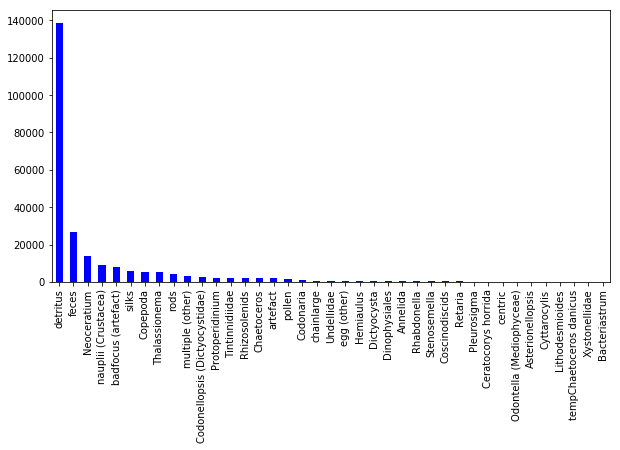

In [12]:
# Plot the repartition of the labels
meta.level2.value_counts().plot(kind='bar', color = 'b',figsize=(10,5))

In [13]:
# Convert the label into classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
meta.level2 = le.fit(meta.level2).transform(meta.level2)


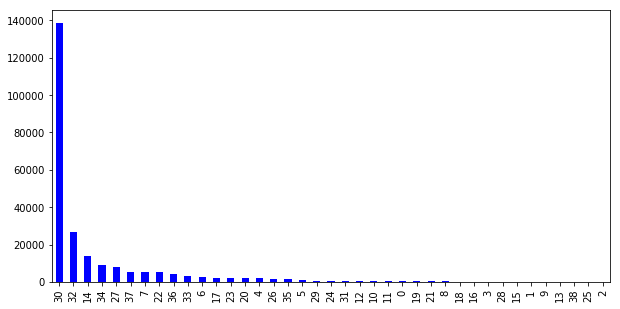

In [14]:
# Plot the repartition of the labels
meta.level2.value_counts().plot(kind='bar', color = 'b',figsize=(10,5))

### Data augmentation : 


In [15]:
# Global variable to balance the classes

SAMPLES_PER_CLASSES = 8000
SHAPE = (32,32)

In [16]:
import zipfile
from io import BytesIO
from PIL import Image
import numpy as np

def extract_zip_to_memory(input_zip):
    '''
    This function extracts the images stored inside the given zip file.
    It stores the result in a python dictionary.
    
    input_zip (string): path to the zip file
    
    returns (dict): {filename (string): image_file (bytes)}
    '''
    input_zip=zipfile.ZipFile(input_zip)
    return {name: BytesIO(input_zip.read(name)) for name in input_zip.namelist() if name.endswith('.jpg')}


img_files = extract_zip_to_memory("imgs.zip")

# Display an example image 
#Image.open(img_files['imgs/32738710.jpg'])

# Load the image as a numpy array:
#np_arr = np.array(Image.open(img_files['imgs/32738710.jpg']))

# Be aware that the dictionary will occupy roughly 2GB of computer memory!
# To free this memory again, run:
# del img_files

#### Drop over represented classes

In [17]:
# First we cut out the classes with number of samples > SAMPLES_PER_CLASSES
import random
random.seed(SEED) 
samples_count = meta.level2.value_counts()

for cls, count in zip(samples_count.index, samples_count):
    # In this case, we cut out the number of samples
    if count > SAMPLES_PER_CLASSES:
        idx_to_drop = random.sample(np.array(meta[meta.level2==cls].index).tolist(),count-SAMPLES_PER_CLASSES)
        meta.drop(index=idx_to_drop, inplace=True)

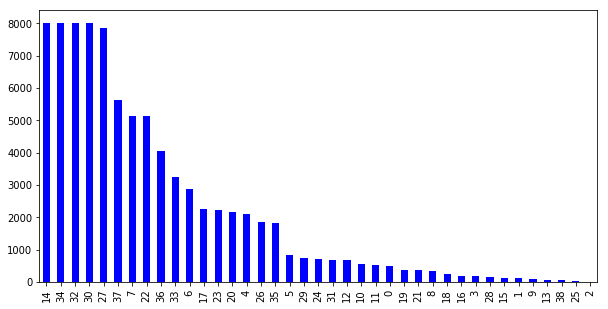

In [18]:
meta.level2.value_counts().plot(kind='bar', color = 'b',figsize=(10,5))

In [19]:
# Before over sampling some image, we split the dataset into train and test set:

from sklearn.model_selection import train_test_split

meta_train, meta_test = train_test_split(meta, test_size=0.2, random_state = SEED)
meta_valid, met_test = train_test_split(meta_test, test_size=0.5, random_state = SEED)

meta_valid.name = 'Valid_df'
meta_test.name = 'Test_df'
meta_train.name = 'Train_df'

#### Fill other classes

In [20]:
from time import time
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import clear_output

def get_train_test_valid(meta_df, sampleCoef):    
    
    def reshape_plankton_image(ima):
            width, height = ima.size
            if width == height:
                new_ima = ima
            elif width > height:
                new_ima = Image.new(ima.mode, (width, width), 255)
                new_ima.paste(ima, (0, (width - height) // 2))
            else:
                new_ima = Image.new(ima.mode, (height, height), 255)
                new_ima.paste(ima, ((height - width) // 2, 0))

            return new_ima.resize(SHAPE, Image.ANTIALIAS )

    def data_augmentation(objid_list, cls):
        """
        :param objid_list: list of a class objid
        :param cls: class name (eg: 31, 21...)

        :return :list of np.array of augmented data
        """
        augmentation = augmentation_dict[cls]
        samples = []
        res = np.zeros((augmentation, SHAPE[0], SHAPE[1]))

        for objid in objid_list:

            ima = Image.open(img_files['imgs/'+str(objid)+'.jpg'])
            reshaped_ima = reshape_plankton_image(ima)
            reshaped_ima_gray = np.expand_dims(np.array(reshaped_ima), 2)
            samples.append(reshaped_ima_gray)

        datagen = ImageDataGenerator(width_shift_range=[-3, 3], 
                                 height_shift_range=0.5,
                                 horizontal_flip=True, 
                                 rotation_range=20,
                                 vertical_flip=True,
                                 brightness_range=[0.2,1.0])

        it = datagen.flow(np.array(samples), batch_size=1, save_format='jpg')

        for i in range(augmentation):
            batch = it.next()
            image = np.squeeze(batch[0], axis=2)
            res[i] = image
        return res
    
    
    random.seed(SEED) 
    
    # First we cut out the classes with number of samples > SAMPLES_PER_CLASSES

    samples_count = meta_df.level2.value_counts()
    augmentation_dict = {} # key: class, value: number of augmentation

    for cls, count in zip(samples_count.index, samples_count):
        # In this case, we cut out the number of samples
        if count > int(SAMPLES_PER_CLASSES*sampleCoef):
            idx_to_drop = random.sample(np.array(meta_df[meta_df.level2==cls].index).tolist(),count-int(SAMPLES_PER_CLASSES*sampleCoef))
            meta_df.drop(index=idx_to_drop, inplace=True)

        augmentation_dict[cls] = max([int(SAMPLES_PER_CLASSES*sampleCoef-count), 0])
         
    
    X = np.zeros((39*int(SAMPLES_PER_CLASSES*sampleCoef), SHAPE[0], SHAPE[1]))
    y = np.zeros((39*int(SAMPLES_PER_CLASSES*sampleCoef), 39))

    origin_time = time()
    for cls in augmentation_dict:
        minut = int((time()-origin_time)/60)
        seco = int(int((time()-origin_time - minut*60)*100)/100)
        print(str(len(samples_count.index)) + " classes in " + meta_df.name)
        print("class " + str(cls) + " starts at " + str(minut) + "min " + str(seco)+"s")
        clear_output(True)
        augmentation = augmentation_dict[cls]
        image_id_of_cls = meta_df.objid[meta_df.level2 == cls].values.astype(int)
        new_images = data_augmentation(image_id_of_cls, cls)
        label = np.zeros(39)
        label[cls] = 1
        for index, image_id in enumerate(image_id_of_cls):
            ima = np.array(reshape_plankton_image(Image.open(img_files['imgs/'+str(image_id)+'.jpg'])))
            X[cls*int(SAMPLES_PER_CLASSES*sampleCoef) + augmentation + index] = ima
            y[cls*int(SAMPLES_PER_CLASSES*sampleCoef) + augmentation + index] = label
        for index, img in enumerate(new_images):
            X[cls*int(SAMPLES_PER_CLASSES*sampleCoef)+index] = img
            y[cls*int(SAMPLES_PER_CLASSES*sampleCoef)+index] = label
   
    return X,y
    

In [21]:
X_train, y_train = get_train_test_valid(meta_train, 0.8)

39 classes in Train_df
class 38 starts at 3min 6s


In [22]:
X_valid, y_valid = get_train_test_valid(meta_valid, 0.1)

39 classes in Valid_df
class 38 starts at 0min 24s


In [23]:
X_test, y_test = get_train_test_valid(meta_test, 0.1)

39 classes in Test_df
class 38 starts at 0min 28s


# 2. Model Selection

In [24]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Reshape
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow.keras.backend
from sklearn.metrics import f1_score
from tensorflow.keras import backend as K

def f1_m(y, y_pred):
    return tfmean(f1_score(tensorflow.keras.backend.eval(y), tensorflow.keras.backend.eval(y_pred), average="macro"))


def recall(y, y_pred):
    true_positives = K.sum(K.round(K.clip(y * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y, y_pred):
    true_positives = K.sum(K.round(K.clip(y * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y, y_pred):
    precision_v = precision(y, y_pred)
    recall_v = recall(y, y_pred)
    return 2*((precision_v*recall_v)/(precision_v+recall_v+K.epsilon()))


def plot_loss_metric(history) : 
    loss = history['loss']
    f1 = history['f1']
    
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(loss, color=color,marker='+')
    ax1.tick_params(axis='y', labelcolor=color)
    plt.grid(True)
    ax2 = ax1.twinx() 

    color = 'tab:blue'
    ax2.set_ylabel('F1 score', color=color)  
    ax2.plot(f1, color=color,marker='+')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout() 
    plt.grid(True)
    plt.show()
    

## Simple NN

In [25]:
def simple_neural_network(input_shape) : 
    
    X_input = Input(input_shape)
    X = Flatten()(X_input)
    X = Dense(100, activation='relu', name ='fc0')(X)
    X = Dense(50, activation='relu', name ='fc1')(X)
    X = Dense(39, activation='softmax', name ='fc2')(X)
    
    model = Model(inputs = X_input , outputs=X , name = 'SimplePlankton')
    
    return model

In [26]:
X_train.shape[1:]

(32, 32)

In [27]:
simpleNN = simple_neural_network(X_train.shape[1:])

In [28]:
simpleNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics = [f1])

In [29]:
simpleNN.fit(x=X_train, y = y_train, epochs = 40 , batch_size = 50)

Epoch 1/40
249600/249600 [==============================] - 23s 93us/step - loss: 15.7047 - f1: 0.0256
Epoch 2/40
249600/249600 [==============================] - 23s 92us/step - loss: 15.7048 - f1: 0.0256
Epoch 3/40
249600/249600 [==============================] - 23s 93us/step - loss: 15.7048 - f1: 0.0256
Epoch 4/40
 55900/249600 [=====>........................] - ETA: 18s - loss: 15.6994 - f1: 0.0260

KeyboardInterrupt: 

In [30]:
simpleNN.evaluate(X_valid, y_valid)

31200/31200 [==============================] - 2s 49us/step


[15.704810903622555, 0.02564102564102564]

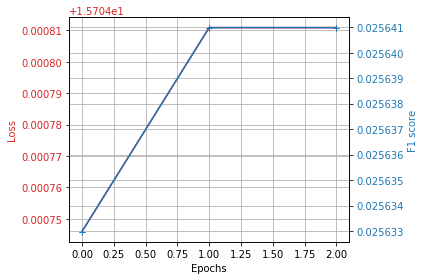

In [31]:
plot_loss_metric(simpleNN.history.history)

## Custom NN

In [32]:
def custom_model(input_shape) : 
    
    
    X_input = Input(input_shape)
    X = Reshape((input_shape[0],input_shape[1],1))(X_input)
    X = Conv2D(5, (5,5), strides = (1,1), name='conv0', activation='relu', padding='SAME')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), name = 'maxpool0', padding="VALID")(X)
    X = Conv2D(10, (4,4), strides = (1,1), name='conv1', activation='relu', padding='SAME')(X)  
    X = MaxPooling2D((2,2), strides=(2,2), name = 'maxpool1',  padding="VALID")(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Flatten()(X)

    X = Dense(39, activation='softmax', name ='fc')(X)
    
    model = Model(inputs = X_input , outputs=X , name = 'CustomPlankton')
    
    return model

In [33]:
customNN = custom_model(X_train.shape[1:])

In [34]:
customNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics = [f1])

In [49]:
customNN.fit(x=X_train, y = y_train, epochs = 10 , batch_size = 250)

Epoch 1/10
249600/249600 [==============================] - 80s 321us/step - loss: 1.7269 - f1: 0.3873
Epoch 2/10
249600/249600 [==============================] - 80s 320us/step - loss: 1.7242 - f1: 0.3880
Epoch 3/10
249600/249600 [==============================] - 80s 321us/step - loss: 1.7176 - f1: 0.3917
Epoch 4/10
249600/249600 [==============================] - 80s 322us/step - loss: 1.7124 - f1: 0.3934
Epoch 5/10
249600/249600 [==============================] - 80s 320us/step - loss: 1.7097 - f1: 0.3941
Epoch 6/10
249600/249600 [==============================] - 80s 320us/step - loss: 1.7083 - f1: 0.3949
Epoch 7/10
249600/249600 [==============================] - 80s 322us/step - loss: 1.7039 - f1: 0.3954
Epoch 8/10
249600/249600 [==============================] - 80s 322us/step - loss: 1.6995 - f1: 0.3982
Epoch 9/10
249600/249600 [==============================] - 80s 321us/step - loss: 1.6955 - f1: 0.3991
Epoch 10/10
249600/249600 [==============================] - 80s 319us/st

In [51]:
result_custom = customNN.evaluate(X_valid, y_valid)
print('Loss on the validation set : {}\nF1 score for validation set : {}'.format(*result_custom))

31200/31200 [==============================] - 9s 287us/step


[1.7958378031314948, 0.3149696175945111]

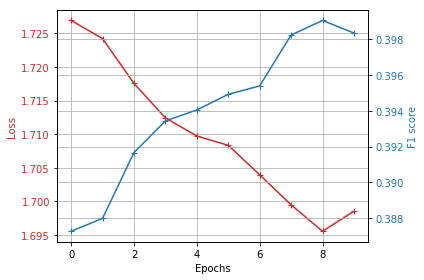

In [50]:
plot_loss_metric(customNN.history.history)

<br>
<br>

**F1 score is better in trainning than validation, maybe try dropout to reduce the gap ?**
<br>
<br>

## Custom NN with regularisation

In [ ]:
def custom_model_reg(input_shape) : 
    
    
    X_input = Input(input_shape)
    X = Reshape((input_shape[0],input_shape[1],1))(X_input)
    X = Dropout(0.3)(X)
    X = Conv2D(5, (5,5), strides = (1,1), name='conv0', activation='relu', padding='SAME')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), name = 'maxpool0', padding="VALID")(X)
    X = Conv2D(10, (4,4), strides = (1,1), name='conv1', activation='relu', padding='SAME')(X)  
    X = Dropout(0.3)(X)
    X = MaxPooling2D((2,2), strides=(2,2), name = 'maxpool1',  padding="VALID")(X)
    X = Dropout(0.5)(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Flatten()(X)

    X = Dense(39, activation='softmax', name ='fc')(X)
    
    model = Model(inputs = X_input , outputs=X , name = 'CustomPlankton')
    
    return model

In [ ]:
customNN_reg = custom_model_reg(X_train.shape[1:])

In [ ]:
customNN_reg.compile(optimizer='adam', loss='categorical_crossentropy', metrics = [f1])

In [ ]:
customNN_reg.fit(x=X_train, y = y_train, epochs = 10 , batch_size = 250)

In [ ]:
result_custom_reg = customNN_reg.evaluate(X_valid, y_valid)
print('Loss on the validation set : {}\nF1 score for validation set : {}'.format(*result_custom_reg))

In [ ]:
plot_loss_metric(customNN_reg.history.history)

## Transfer Learning 

We decided to remove the number of data for computation, as the model we'll use as a lot of layers

In [9]:
# Global variable to balance the classes

SAMPLES_PER_CLASSES = 2000
SHAPE = (32,32)

In [15]:
X_train, y_train = get_train_test_valid(meta_train, 0.8)

39 classes in Train_df
class 38 starts at 1min 64s


In [16]:
X_valid, y_valid = get_train_test_valid(meta_valid, 0.1)

39 classes in Valid_df
class 38 starts at 0min 7s


In [17]:
X_test, y_test = get_train_test_valid(meta_test, 0.1)

39 classes in Test_df
class 38 starts at 0min 8s


VGG16 is a convolutional neural network model that achieved 92.7% on top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. 

We decided to use this architecture for our problem. 

In [21]:
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


#### Features extraction

In [22]:
X_train_tf = np.stack([X_train.reshape(-1,32,32)]*3, axis=-1)
X_val_tf = np.stack([X_valid.reshape(-1,32,32)]*3, axis=-1)
X_test_tf = np.stack([X_test.reshape(-1,32,32)]*3, axis=-1)


In [23]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten


def transfer_model(input_shape) : 
    
    pretrained_model = tf.keras.applications.VGG(input_shape=input_shape, include_top=False)
    pretrained_model.trainable = False

    model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(39, activation='softmax')
        ])
    
    
    return model
    
    
    

In [24]:
t_model = transfer_model(X_train_tf.shape[1:])

/mnt/workspace/.local/lib/python3.5/site-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [25]:
t_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1, 1, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 39)                49959     
Total params: 2,307,943
Trainable params: 49,959
Non-trainable params: 2,257,984
_________________________________________________________________


#### Let s freeze the weights of the VGG model

In [26]:
t_model.compile(optimizer='adam',  loss='categorical_crossentropy', metrics = [f1])

In [ ]:
t_model.fit(x=X_train_tf, y = y_train, epochs = 100 , batch_size = 1000)

Train on 62400 samples
Epoch 1/100


In [ ]:
result_transfer = t_model.evaluate(X_val_tf, y_val, batch_size=250)


In [ ]:
plot_loss_metric(t_model.history.history)

In [ ]:
print('Loss on the validation set : {}\nF1 score for validation set : {}'.format(*result_transfer))

## Features based classification

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

SEED = 77

meta = pd.read_csv('meta.csv')
taxo = pd.read_csv('taxo.csv')

features_nat = pd.read_csv('features_native.csv.gz')
features_sk = pd.read_csv('features_skimage.csv.gz')

In [111]:
df = meta.merge(features_nat, left_on='objid', right_on='objid')
df = df.merge(features_sk , left_on='objid', right_on = 'objid')

In [112]:
# Print the features that have high ratio of NaN values
features_nan_drop = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)
print(features_nan_drop.head(20))

weighted_moments_normalized0    100.000000
moments_normalized0             100.000000
weighted_moments_normalized4    100.000000
moments_normalized1             100.000000
moments_normalized4             100.000000
weighted_moments_normalized1    100.000000
cdexc                            14.132425
feretareaexc                     14.132425
perimareaexc                     14.132425
nb3_area                          2.813513
symetrieh_area                    2.813513
symetriev_area                    2.813513
nb1_area                          2.813513
nb2_area                          2.813513
skeleton_area                     2.813513
convarea_area                     2.813513
level1                            1.368581
level2                            0.411724
projid                            0.000000
meanpos                           0.000000
dtype: float64


In [113]:
# Drop the nan values features that have higher Nan values than 10 %

df.drop(features_nan_drop[:9].keys(), axis=1,inplace = True)




In [114]:
# Drop the NaN values for the label 

indexes_nan_level2 = df.level2[df.level2.isnull()].index

df.drop(indexes_nan_level2 , axis = 0 , inplace = True)



In [115]:
# Drop level1 as this is not our target 

df.drop(['level1'],axis=1, inplace=True)

In [116]:
nan_features = df.columns[(df.isnull().sum()!=0)]

In [117]:
# Fill NaN with 0 
for feature in nan_features : 
    
    df[feature].fillna(0, inplace=True)


### Conversion categorical values

In [118]:
categorical_features = df.columns[df.dtypes == object]

In [119]:
df[categorical_features[0]].replace({'V':1}, inplace=True)      

In [120]:
# Convert the date into the number of days from the first date
df[categorical_features[1]] = pd.to_datetime(df[categorical_features[1]])    
df[categorical_features[1]] = (df[categorical_features[1]] - df[categorical_features[1]].min())  / np.timedelta64(1,'D')

In [121]:
# Drop the categorical features that can be converted easily 
df.drop([categorical_features[2],categorical_features[3],categorical_features[4]],axis=1, inplace=True)

In [122]:
row_drop = np.where(df.level2 == 'detritus')[0].shape[0] - 26936

In [128]:
indexes = df[df.level2 == 'detritus'].index[:row_drop]

In [130]:
df.drop(indexes,inplace=True)

In [132]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df.level2 = le.fit(df.level2).transform(df.level2)




In [134]:

from sklearn.model_selection import train_test_split
y = df.level2.values
X = df.drop(['level2'],axis=1).values


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=SEED)



In [135]:
from sklearn.metrics import f1_score

def f1score(y,y_predict) :
    # f1 score with the average done 
    return f1_score(y,y_predict , average = 'macro')




In [136]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import fbeta_score, make_scorer

def plot_scores(clf,name) :
    
    
    clf_score = cross_validate(clf, X_train, y_train, scoring={'f1_score': make_scorer(f1score)}, cv=5)
    
    y_predict_clf = clf.fit(X_train, y_train).predict(X_train)
    
    
    
    data = {'Training set' : [f1score(y_predict_clf,y_train)],
           'Validation set': [clf_score['test_f1_score'].mean()]}
    
    df = pd.DataFrame(data, columns=['Training set','Validation set'], index=['F1 score'])
    print('Model used : {}'.format(name))
    return df
    

In [137]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(max_depth=20, random_state=SEED)


In [138]:
plot_scores(rfr, 'Random Forest')

Model used : Random Forest


,Training set,Validation set
F1 score,0.999747,0.762654


In [140]:
y_pred = rfr.fit(X_train,y_train).predict(X_test)

In [141]:
print('Finale score on test : {}'.format(f1score(y_test, y_pred)))

Finale score on test : 0.7664246351669989
